In [1]:
# modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten, UpSampling2D
# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D, Input
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential, Model
# Tools for data transformation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping  

Using TensorFlow backend.


# 1 Autoencoder

A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should be able to do better using convolutional layers instead of Dense layers.<br/>&nbsp;&nbsp;Build and fit a convolutional autoencoder for the Fashion MNIST dataset. The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.<br/>&nbsp;&nbsp;An example to guide your thinking can be found toward the bottom of this post https://blog.keras.io/building-autoencoders-in-keras.html.<br/>&nbsp;&nbsp;After training your network, visualize some examples of input images and their decoded reconstruction.

In [2]:
# Data Munging/Reshaping
# Load pre-shuffled Fashion MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Declaring a depth of 1 for MNIST
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
# Setting up calues as float32s that are bounded between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [3]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
# Train the model for 100 epochs
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 83s 1ms/step - loss: 0.3208 - val_loss: 0.2918
Epoch 2/100
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2835 - val_loss: 0.2832
Epoch 3/100
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2764 - val_loss: 0.2752
Epoch 4/100
60000/60000 [==============================] - 91s 2ms/step - loss: 0.2725 - val_loss: 0.2724
Epoch 5/100
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2705 - val_loss: 0.2727
Epoch 6/100
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2683 - val_loss: 0.2748
Epoch 7/100
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2670 - val_loss: 0.2695
Epoch 8/100
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2657 - val_loss: 0.2679
Epoch 9/100
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2645 - val_loss: 0.2

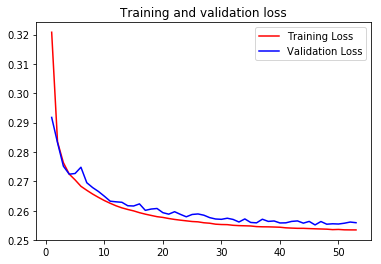

In [6]:
# Plot
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)
plt.plot( epochs, loss, 'r', label = 'Training Loss')
plt.plot( epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

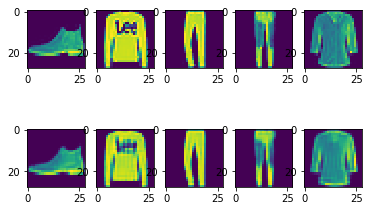

In [9]:
# Reconstruction
n = 5
for k in range(n):
    ax = plt.subplot(2, n, k+1)
    plt.imshow(x_test[k:k+1,:].reshape((28,28)))
    ax = plt.subplot(2, n, k+1 + n)
    reconstruction = autoencoder.predict(x_test[k:k+1,:])
    reconstruction.resize((28,28))
    plt.imshow(reconstruction)